![](./resources/Demo-official_download.png)

### Table of contents

- [Purpose and prerequisites](###-Purpose-and-prerequisites)
- [Introduction](###-Introduction)
- [Step 1: Define the collection and product of interest](###-Step-1:-Define-the-collection-and-product-of-interest)
- [Step 2: Define your region of interest](###-Step-2:-Define-your-region-of-interest)
- [Step 3: Select your growing season of interest](###-Step-3:-Select-your-growing-season-of-interest)
- [Step 4: Specify output folder](###-Step-4:-Specify-output-folder)
- [Step 5: Download the products](###-Step-5:-Download-the-products)

### Purpose and prerequisites

This notebook demonstrates how to download an official WorldCereal product for your area and season of interest through OpenEO from the Copernicus Data Space Ecosystem (CDSE).

You will need a [CDSE account](https://dataspace.copernicus.eu/) in order to use this notebook.

### Introduction

The WorldCereal project has generated a suite of [global classification products for the year 2021](https://esa-worldcereal.org/en/products/global-maps), covering:
- a temporary crop mask
- season-specific active cropland markers
- season-specific crop type masks for winter cereals, spring cereals and maize
- season-specific active irrigation masks

To account for local differences in crop seasonality, the world has been subdivided into Agro-ecological zones (AEZ). Each zone has its own definition of growing seasons, which is important to keep in mind when downloading a product! More specifically, an AEZ is characterized by one winter cereals season and up to two maize seasons. The figures below illustrate the spatial distribution of the AEZs and the availability of products for each season:

![](./resources/Phase_I_AEZ.PNG)
WorldCereal Agro-ecological zones for 2021 global products

![](./resources/Phase_I_seasons.PNG)
WorldCereal product availability per season for the 2021 product collection

### Step 1: Define the collection and product of interest

At this moment, global products are only available for the year 2021.

Available products are:
- TEMPORARYCROPS
- ACTIVECROPLAND
- WINTERCEREALS
- SPRINGCEREALS
- MAIZE
- IRRIGATION

In [1]:
product_collection = '2021'

product = 'TEMPORARYCROPS'

### Step 2: Define your region of interest

Draw your desired spatial extent on the interactive map below.
The maximum allowed area for downloading a product is 1000 x 1000 km².
In case you are interested in larger areas, we recommend to download the AEZ-based products directly from [Zenodo](https://zenodo.org/records/7875105).

In [2]:
# Step 2: Define the area of interest

from worldcereal.utils.map import ui_map

map = ui_map(area_limit=1000000)
map.show_map()

### Step 3: Select your growing season of interest

You can use the snippet below to consult the available growing seasons for your area of interest.

Note that if you are only interested in the TEMPORARYCROPS product, you can skip this part.

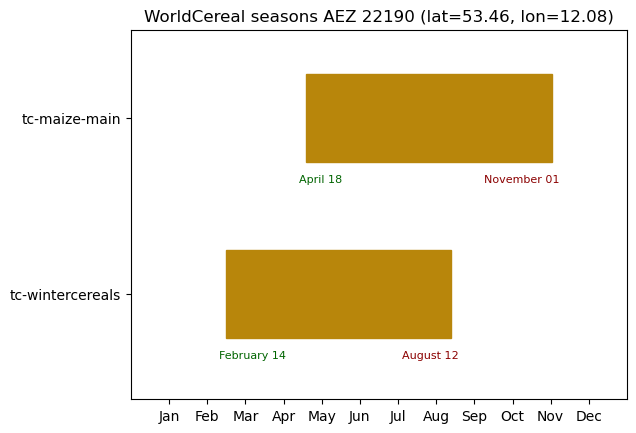

In [3]:
from notebook_utils.seasons import retrieve_phaseI_seasons

spatial_extent = map.get_extent()
seasons = retrieve_phaseI_seasons(spatial_extent)

<div class="alert alert-block alert-info">
<b>Interpretation of growing seasons:</b><br> 
To correctly interprete the above figure, you should keep in mind that 2021 WorldCereal products have been produced for growing seasons ENDING in the year 2021.<br>
Examples:<br>
- If a season starts in September and ends in February, the temporal extent of the product is: Sept 2020 - Feb 2021<br>
- If a season starts in March and ends in November, the temporal extent of the product is: March 2021 - November 2021.<br>
</div>

In case you would like to download the product for ALL growing seasons occuring in your area of interest, you should use:

`growing_season` = None

If interested in a specific growing season, specify the correct one from the figure above, example:

`growing_season` = tc-maize-main

In [3]:
growing_season = None

### Step 4: Specify output folder

The next cell will prompt you to provide a unique tag enabling you to specify a dedicated download folder for your products of interest.

In [4]:
import os
from pathlib import Path
from notebook_utils.classifier import get_input

# Specify the local directory where the resulting maps should be downloaded to.
run = get_input('directory')
output_dir = Path(os.getcwd()) / "downloads" / f'2021_product_{run}'
print(f"Output directory: {output_dir}")

Output directory: /data/users/Private/jeroendegerickx/git/worldcereal/worldcereal-classification/notebooks/downloads/2021_product_TEST


### Step 5: Download the products

The following cell launches an OpenEO download job on the CDSE federation backend.

In [5]:
from worldcereal.job import download_official_product

spatial_extent = map.get_extent()
product_paths = download_official_product(spatial_extent,
                                     product,
                                     output_dir,
                                     season=growing_season,
                                     product_collection=product_collection,)


Authenticated using refresh token.
0:00:00 Job 'terrascope-j-25022114011644d381977aa2eed5d66c': send 'start'
0:00:16 Job 'terrascope-j-25022114011644d381977aa2eed5d66c': queued (progress 0%)
0:00:21 Job 'terrascope-j-25022114011644d381977aa2eed5d66c': queued (progress 0%)
0:00:28 Job 'terrascope-j-25022114011644d381977aa2eed5d66c': queued (progress 0%)
0:00:36 Job 'terrascope-j-25022114011644d381977aa2eed5d66c': queued (progress 0%)
0:00:46 Job 'terrascope-j-25022114011644d381977aa2eed5d66c': queued (progress 0%)
0:00:58 Job 'terrascope-j-25022114011644d381977aa2eed5d66c': running (progress N/A)
0:01:14 Job 'terrascope-j-25022114011644d381977aa2eed5d66c': running (progress N/A)
0:01:33 Job 'terrascope-j-25022114011644d381977aa2eed5d66c': running (progress N/A)
0:01:57 Job 'terrascope-j-25022114011644d381977aa2eed5d66c': running (progress N/A)
0:02:27 Job 'terrascope-j-25022114011644d381977aa2eed5d66c': running (progress N/A)
0:03:05 Job 'terrascope-j-25022114011644d381977aa2eed5d66c': 

ValidationError: 2 validation errors for InferenceResults
products.TEMPORARYCROPS.url
  Input should be a valid string [type=string_type, input_value=None, input_type=NoneType]
    For further information visit https://errors.pydantic.dev/2.8/v/string_type
products.TEMPORARYCROPS.temporal_extent
  Input should be a dictionary or an instance of TemporalContext [type=dataclass_type, input_value=None, input_type=NoneType]
    For further information visit https://errors.pydantic.dev/2.8/v/dataclass_type

In [6]:
product_paths

NameError: name 'product_paths' is not defined

### Step 6: Visualize products

Either load the products directly into QGIS, or use the below code snippet for quick visualization.

Keep in mind:
- value 0 represents the "negative class". E.g. no-cropland in temporarycrops product, not maize in maize product
- value 100 represents the "positive class". E.g. active in activecropland product, irrigated in irrigation product.
- value 254 represents "no cropland" class in seasonal products
- value 255 is the no-data value

Using the snippet below, only the classification results itself are visualized. Some products contain, aside from the classification results, also information on the confidence score per pixel (0-100) in the second band of the resulting raster layer. Use QGIS to visualize this information if needed.

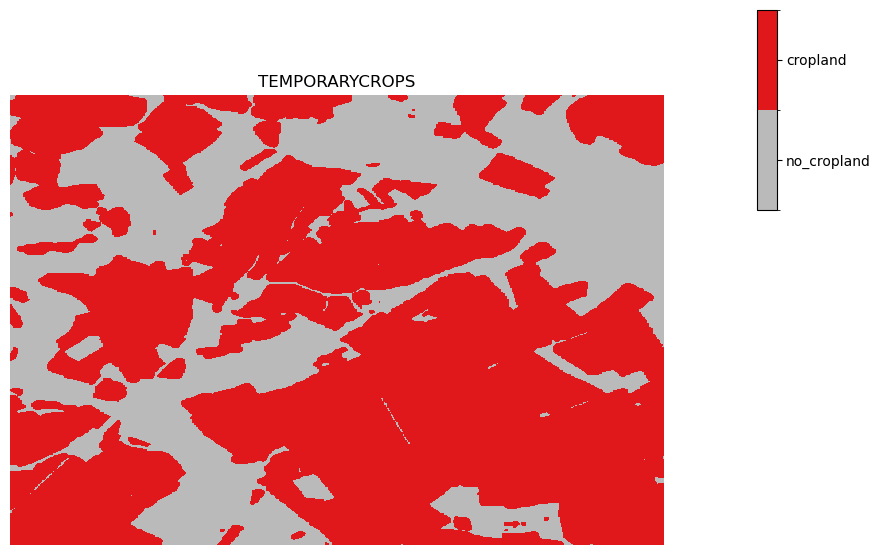

In [ ]:
from notebook_utils.visualization import visualize_2021_products
# from pathlib import Path

# product_paths = [Path('/vitodata/worldcereal/tmp/jeroen/TEMPORARYCROPS.tif')]
# product = 'TEMPORARYCROPS'

visualize_2021_products(product_paths, product)

In [ ]:
to test:
      - download maize, springcereals, wintercereals, activecropland --> no data value correct?
      - download area on the border of 2 or more AEZs
    - download a large area
    
  